## GDP Estimado para Mexico

In [78]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
df_gdp = pd.read_excel("Mexico GDP.xlsx")

In [13]:
df_gdp.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [46]:
df_gdp['GDP_normalizado'] = df_gdp['GDP'] / df_gdp['GDP'].max()
df_gdp['Periodo_normalizado'] = df_gdp['Periodo'] / df_gdp['Periodo'].max()
df_gdp.sort_values(by="Periodo")

,Periodo,GDP,GDP_normalizado,Periodo_normalizado
0,1960,1.304000e+10,0.009914,0.969817
1,1961,1.416000e+10,0.010765,0.970312
2,1962,1.520000e+10,0.011556,0.970807
3,1963,1.696000e+10,0.012894,0.971301
4,1964,2.008000e+10,0.015266,0.971796
...,...,...,...,...
57,2017,1.158913e+12,0.881067,0.998021
58,2018,1.222408e+12,0.929340,0.998516
59,2019,1.269404e+12,0.965069,0.999010
60,2020,1.087118e+12,0.826485,0.999505


In [42]:
def funcionGDP(a, teta1, teta2):
    gdp= 1/(1+np.exp(-(teta1+teta2*a)))
    return gdp

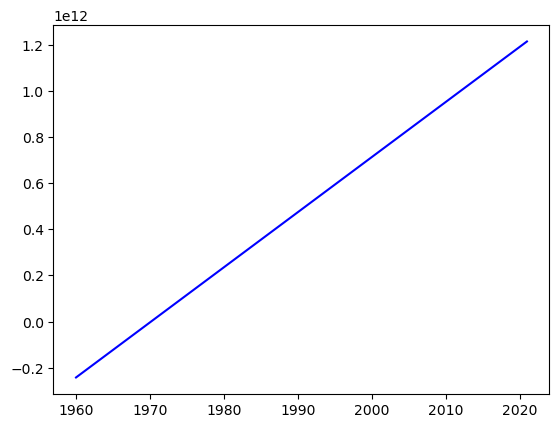

In [90]:
x_data = df_gdp['Periodo'].values
y_data = df_gdp['GDP'].values

m_regression=LinearRegression()
#-1 significa que el número de filas será automáticamente determinado por la cantidad de datos disponibles. 
#Python ajustará el número de filas para asegurarse de que el total de elementos siga siendo el mismo.
#1 indica que queremos una sola columna.

m_regression.fit( x_data.reshape(-1,1), y_data)

y_prediccion= m_regression.predict(x_data.reshape(-1,1))
plt.plot(x_data, y_prediccion, color='b') 

Como se puede ver con esta regresión se nos va a complicar poder hacer un buen análisis, ya que no muestra la veracidad del comportamiento de los datos por ello es mejor utlizar la fórmula que se utiliza para poder sacar el GDP y así tener un resultado más cercano a la realidad.

In [58]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcionGDP, df_gdp['Periodo_normalizado'].values, df_gdp['GDP_normalizado'].values)
print("teta 1: ", popt[0], "teta 2: ", popt[1])

teta 1:  -268.69012377458154 teta 2:  271.59787723120934


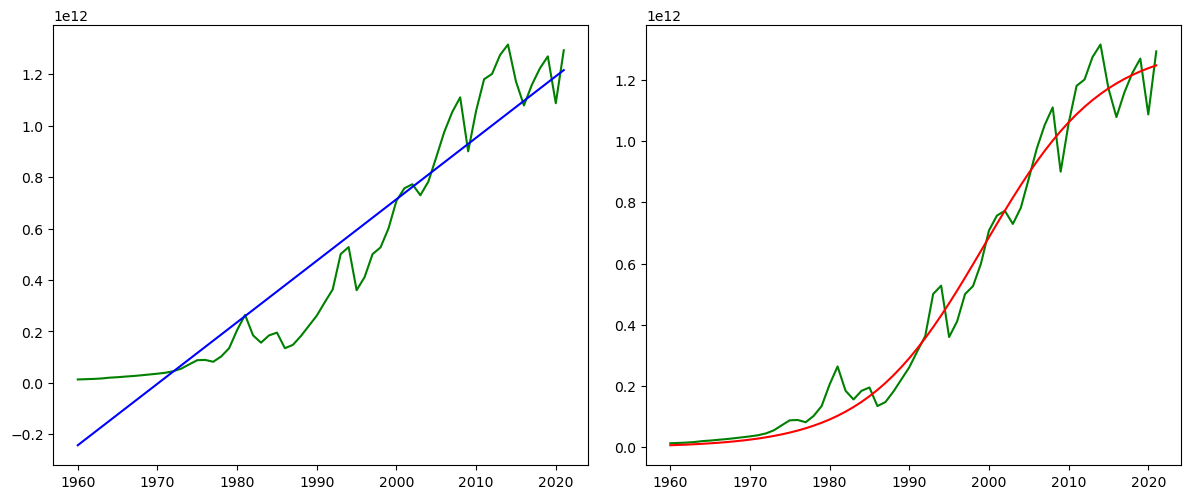

In [122]:
a = df_gdp['Periodo_normalizado'].values
ajuste_y= funcionGDP(a, popt[0], popt[1])

fig, ax = plt.subplots(1,2, figsize = (12, 5))
plt.tight_layout()

ax[0].plot(df_gdp['Periodo'], df_gdp['GDP'], 'g')
ax[1].plot(df_gdp['Periodo'], df_gdp['GDP'], 'g')

ax[0].plot(x_data, y_prediccion, color='b') 
ax[1].plot(df_gdp['Periodo'], ajuste_y * df_gdp['GDP'].max(), 'r')

Como se puede observar en estos gráficos podemos darnos centa que la curva exponencial nos es más cercana a la realidad, aunque la regresión muestras una tendencia generalizada la predicción con la curva de exponencial es mas precisa.

In [137]:
# Se usa 1 porque al dividir 2022 con 2022 al ser el valor maximo ese seria nuestro punto limite por la falta de datos. 
resultadoExp=funcionGDP(1, popt[0], popt[1])  * df_gdp['GDP'].max()
print (resultadoExp)

1247253334727.4578


In [138]:
#Se crea una matriz para que pueda ser utilizada en el modelo de regresion.
a2022= np.array([[2022]])

#suppress=True: Este argumento evita que se utilice la notación científica para números grandes o pequeños.
#'float_kind':'{:0.2f}'.format, le estás diciendo a numpy que cuando imprima los números flotantes, debe mostrarlos con dos decimales y sin notación científica.
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})
resultadoReg = m_regression.predict(a2022)
print (resultadoReg)

[1239856322086.33]


Comparando ambos resultados hay una diferencia pequeña del 0.59% aunque a cifras de dinero es muchísimo, son 7 billones de diferencis en GDP, entonces es mejor quedarse con el resultado exponencial ya que es más preciso y muestra más confiabilidad en el resultado. 

In [146]:
Diff = (resultadoExp)-(resultadoReg.item())
Diffp = ((resultadoExp)-resultadoReg.item())/(resultadoExp)*100
print(f'Diferencia: {Diff:.2f}')
print(f'Diferencia porcentual: {Diffp:.2f}%')

Diferencia: 7397012641.13
Diferencia porcentual: 0.59%
